<a href="https://colab.research.google.com/github/RashmiBhagya/Transfer-Leaning-With-Image-Clasifier-Banana-Detection/blob/main/banana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy -q
!pip install pandas -q
!pip install matplotlib -q
!pip install tensorflow -q

!pip install opendatasets -q



In [2]:
# import necessary libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time

import opendatasets as od

Load Dataset

In [3]:
# download dataset
od.download("https://www.kaggle.com/datasets/rashmipremadasa/healty-banana-detection-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: rashmipremadasa
Your Kaggle Key: ··········


100%|██████████| 1.33G/1.33G [00:59<00:00, 24.0MB/s]


In [4]:
BATCH_SIZE = 32
IMAGE_SIZE = (128,128)

In [150]:
train_data_dir = "/content/healty-banana-detection-dataset/Banana/Banana/Test"
test_data_dir = "/content/healty-banana-detection-dataset/Banana/Banana/Train"


In [151]:
train_data = tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                         batch_size=BATCH_SIZE,
                                                         image_size=IMAGE_SIZE,
                                                         subset='training',
                                                         validation_split=0.1,
                                                         seed=42)

validation_data = tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                         batch_size=BATCH_SIZE,
                                                         image_size=IMAGE_SIZE,
                                                         subset='validation',
                                                         validation_split=0.1,
                                                         seed=42)

test_data = tf.keras.utils.image_dataset_from_directory(test_data_dir,
                                                         batch_size=BATCH_SIZE,
                                                         image_size=IMAGE_SIZE)

Found 264 files belonging to 2 classes.
Using 238 files for training.
Found 264 files belonging to 2 classes.
Using 26 files for validation.
Found 730 files belonging to 2 classes.


In [152]:
class_names = train_data.class_names
class_names

['Chemical', 'Non-Chemical']

In [153]:
for image_batch,label_batch in train_data.take(1):
    print(image_batch.shape)
    print(label_batch.shape)

(32, 128, 128, 3)
(32,)


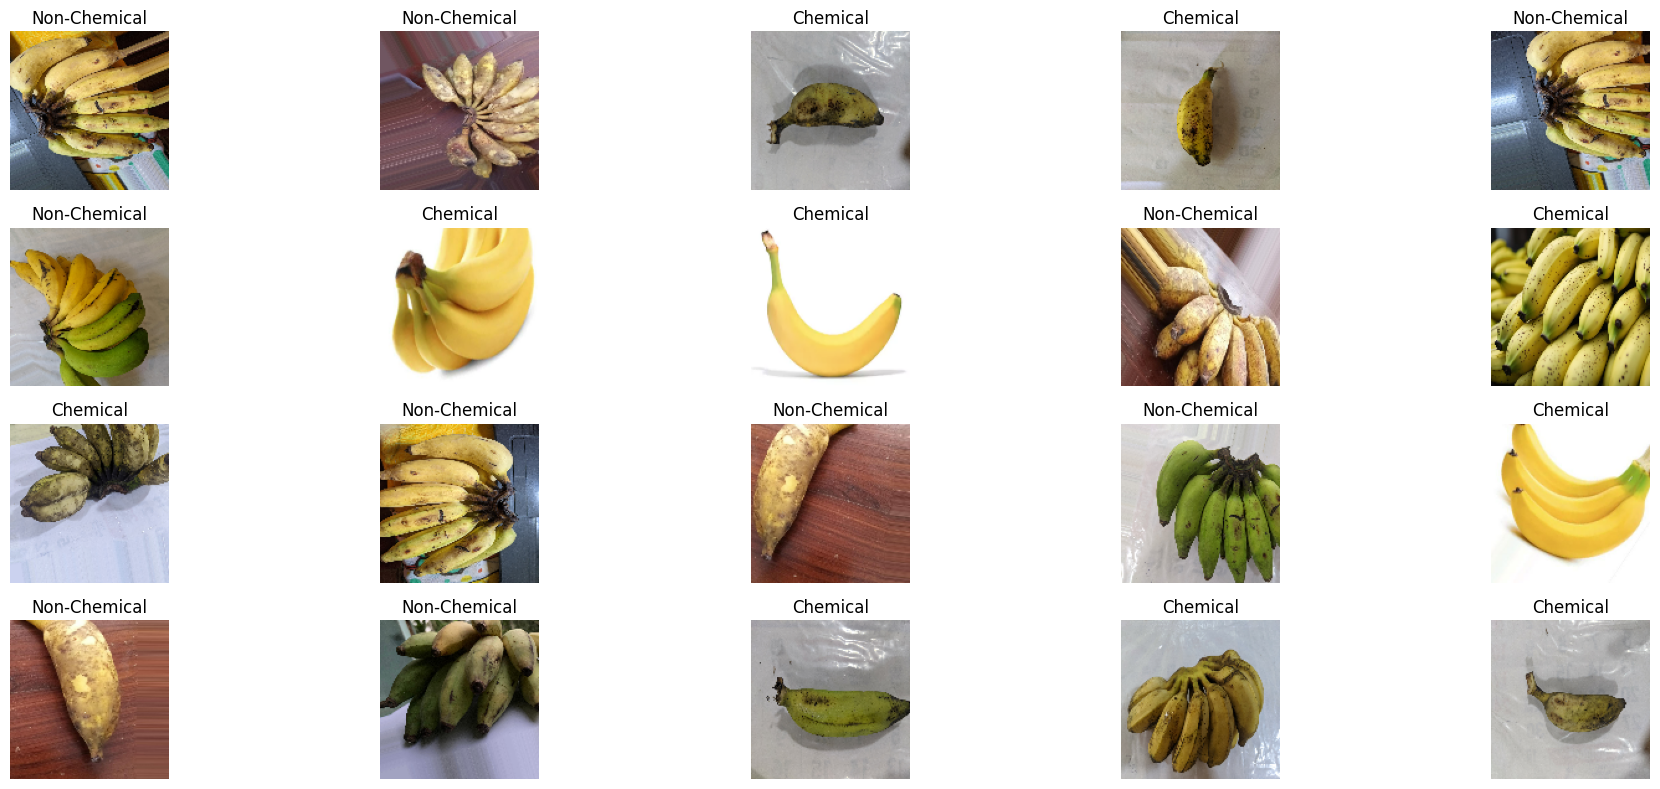

In [154]:
import matplotlib.pyplot as plt

# Plot data sample
plt.figure(figsize=(20, 8))
for image, label in train_data.take(1):
    for i in range(20):
        ax = plt.subplot(4, 5, i+1)  # Adjusted to 4 rows and 5 columns
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(class_names[label[i]])
        plt.axis('off')

plt.tight_layout()
plt.show()


Scaling Images


In [155]:
for image,label in train_data.take(1):
    for i in range(1):
      print(image)

tf.Tensor(
[[[[254.       255.       245.      ]
   [254.       255.       245.      ]
   [254.       255.       245.      ]
   ...
   [255.       255.       255.      ]
   [255.       255.       255.      ]
   [255.       255.       255.      ]]

  [[254.       255.       247.      ]
   [254.       255.       247.      ]
   [254.       255.       247.      ]
   ...
   [255.       255.       255.      ]
   [255.       255.       255.      ]
   [255.       255.       255.      ]]

  [[254.03906  255.       247.11719 ]
   [254.03906  255.       247.11719 ]
   [254.01007  255.       247.0882  ]
   ...
   [255.       255.       255.      ]
   [255.       255.       255.      ]
   [255.       255.       255.      ]]

  ...

  [[245.       245.       245.      ]
   [244.       244.       244.      ]
   [243.       243.       243.      ]
   ...
   [245.97101  227.40625  154.97327 ]
   [240.40625  221.9002   139.89667 ]
   [235.96094  216.39465  127.308716]]

  [[245.       245.       245.    

In [156]:
train_data = train_data.map(lambda x,y:(x/255,y))
validation_data = validation_data.map(lambda x,y:(x/255,y))
test_data = test_data.map(lambda x,y:(x/255,y))

In [157]:
for image,label in train_data.take(1):
    for i in range(1):
      print(image)

tf.Tensor(
[[[[0.75919116 0.7848039  0.8064951 ]
   [0.72855395 0.73835784 0.7344363 ]
   [0.72683823 0.7425245  0.7484069 ]
   ...
   [0.6229779  0.5876838  0.5523897 ]
   [0.6426471  0.6073529  0.5720588 ]
   [0.62322307 0.6066176  0.5716299 ]]

  [[0.74123776 0.76868874 0.8000613 ]
   [0.7228554  0.74246323 0.7581495 ]
   [0.7050858  0.7207721  0.72469366]
   ...
   [0.6594363  0.6202206  0.5849265 ]
   [0.6509804  0.6117647  0.57254905]
   [0.65729165 0.61807597 0.58278185]]

  [[0.7511642  0.7786152  0.8075368 ]
   [0.7420343  0.76164216 0.78517157]
   [0.70140934 0.71317405 0.7327819 ]
   ...
   [0.6564951  0.621201   0.58590686]
   [0.6606005  0.61746323 0.5939338 ]
   [0.67009807 0.6308824  0.5955882 ]]

  ...

  [[0.6234069  0.6234069  0.6234069 ]
   [0.63033086 0.6224877  0.6264093 ]
   [0.634375   0.634375   0.6422181 ]
   ...
   [0.57781863 0.56213236 0.52683824]
   [0.55802697 0.5423407  0.5070466 ]
   [0.5710784  0.55539215 0.52009803]]

  [[0.6177083  0.6177083  0.617708

Transfer Learning

In [302]:
pretrained_model = tf.keras.applications.xception.Xception(include_top=False,
                                                           input_shape=(128,128,3),
                                                           weights="imagenet",
                                                           pooling='max')

for layer in pretrained_model.layers:
        layer.trainable=False

83683744/83683744 [==============================] - 4s 0us/step


Data Augmentation

In [303]:
data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.RandomFlip("horizontal",input_shape=(128,128,3)),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
  ]
)

Model Building

In [304]:
model = tf.keras.models.Sequential()

model.add(pretrained_model)

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=32, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [305]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 flatten_3 (Flatten)         (None, 2048)              0         
                                                                 
 dense_12 (Dense)            (None, 128)               262272    
                                                                 
 dense_13 (Dense)            (None, 128)               16512     
                                                                 
 dense_14 (Dense)            (None, 32)                4128      
                                                                 
 dense_15 (Dense)            (None, 1)                 33        
                                                                 
Total params: 21144425 (80.66 MB)
Trainable params: 28

In [306]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

Model Training

In [307]:
start_time = time.time()

history = model.fit(train_data,
                    epochs=3,
                    validation_data=validation_data)

end_time = time.time()

Epoch 1/3
8/8 [==============================] - 37s 3s/step - loss: 0.6218 - accuracy: 0.6513 - val_loss: 0.2432 - val_accuracy: 0.8846
Epoch 2/3
8/8 [==============================] - 27s 2s/step - loss: 0.2501 - accuracy: 0.8992 - val_loss: 0.2226 - val_accuracy: 0.8846
Epoch 3/3
8/8 [==============================] - 29s 2s/step - loss: 0.1270 - accuracy: 0.9622 - val_loss: 0.1422 - val_accuracy: 0.9231


In [308]:
print(f'Total time for training {(end_time-start_time):.3f} seconds')

Total time for training 116.616 seconds


Performance Analysis

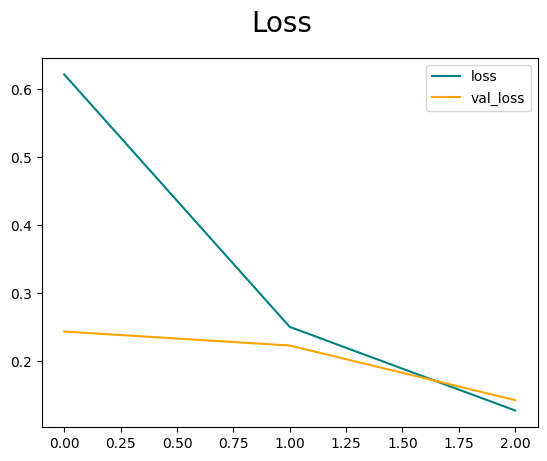

In [309]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend()
plt.show()

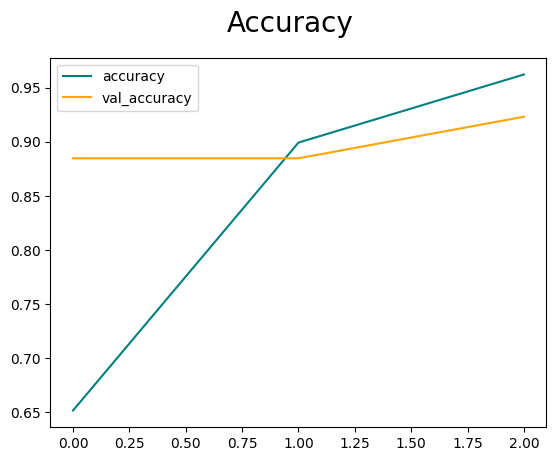

In [310]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend()
plt.show()

Model Evaluation

In [311]:
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()
accuracy = tf.keras.metrics.BinaryAccuracy()

In [312]:
for batch in test_data.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    accuracy.update_state(y, yhat)

1/1 [==============================] - 3s 3s/step


In [313]:
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.6142857>

In [314]:
recall.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.4764543>

In [315]:
accuracy.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.5931507>

Test

In [316]:
!pip install opencv-python -q

In [317]:
import cv2

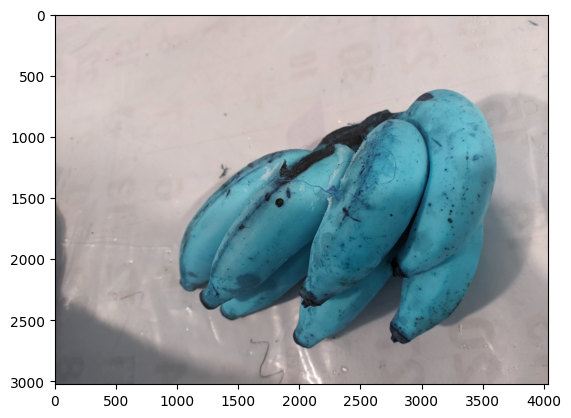

In [531]:
image = cv2.imread('/content/healty-banana-detection-dataset/Banana/Banana/Test/Chemical/Suwadel/PXL_20240202_171442862.jpg')
plt.imshow(image)
plt.show()

In [532]:
resized_image = tf.image.resize(image, IMAGE_SIZE)
scaled_image = resized_image/255


In [533]:
scaled_image.shape

TensorShape([128, 128, 3])

In [534]:
np.expand_dims(scaled_image, 0).shape

(1, 128, 128, 3)

In [535]:
yhat = model.predict(np.expand_dims(scaled_image, 0))

1/1 [==============================] - 0s 90ms/step


In [536]:
yhat

array([[0.24804527]], dtype=float32)

In [537]:
class_names

['Chemical', 'Non-Chemical']

In [538]:
if yhat > 0.5:
    print(f'{class_names[1]}')
else:
    print(f'{class_names[0]}')


Chemical
